# AgroPad Color Calibration Procedure

In [ ]:
#
# Copyright 2020- IBM Inc. All rights reserved
# SPDX-License-Identifier: BSD-3-Clause
#

## Overview

In a nutshell, the AgroPad calibration procedure can be summarized by:
1. Acquiring images of the colorimetric output of the AgroPad cards when they are subjected to different standard solutions of a known analyte on in controlled laboratory conditions, creating a *calibration curve*.
2. Acquire an image of a known *colorimetric reference* in the same laboratory conditions used in the *calibration curve*.
3. Use the functions in the **uIPL Library** to extract the color information from each spot of each card and store the information in a DataFrame.
4. Process the DataFrame to include information about the colorimetric indicators used for each spot, the standard concentration of analyte in each test, etc.
5. Process the *colorimetric reference* to generate a *illumination reference* containing information regarding the colors of the standard references in the AgroPad card. This data will be used to correct the test images for differences in illumination conditions and/or camera settings before the ML classifiers.
6. Export the DataFrame into a xlsx file that can later be processed to train the Machine learning models that will be used for card analysis.

### References

[1] *Jaione Tirapu-Azpiroz, Matheus Esteves Ferreira, Daniel Vitor Lopes Marcondes Marçal, Ademir Ferreira Silva, Ricardo Luis Ohta, Mathias B. Steiner, "High-resolution colorimetric detection on paper-based microfluidic devices via indicator merging and machine learning," Proc. SPIE 11637, Microfluidics, BioMEMS, and Medical Microsystems XIX, 116370D (5 March 2021); doi: 10.1117/12.2577303*

[2] *Matheus Esteves Ferreira, Jaione Tirapu-Azpiroz, Daniel Vitor Lopes Marcondes Marçal, Ademir Ferreira da Silva, Ricardo Luis Ohta, Mathias B. Steiner, "Illumination compensation algorithm for colorimetric detection of microfluidic paper-based devices with a smartphone," Proc. SPIE 11651, Optical Diagnostics and Sensing XXI: Toward Point-of-Care Diagnostics, 1165108 (5 March 2021); doi: 10.1117/12.2578441*

## Step-by-step example

### Card Segmentation and Color Extraction

First we import the ***uPad image processing library (uIPL)*** that contains all the functions we will need for analysis

In [1]:
%matplotlib widget

In [2]:
from uIPL_2022_v2 import *

**Enter Data Folder Below**

In [3]:
cd ~/Desktop/AgroPad External Code/Experimental Calibration Data/AllData_BcP

/Users/matheusferreira/Desktop/AgroPad External Code/Experimental Calibration Data/AllData_BcP


The *generate_DataFrame* function will automatically analyze all images in the folder and extract the RGB information from each spot. The input variables are:
- crop: The output area of the card to be analyzed (i.e. img[crop[0]:crop[1], crop[2}:crop[3]])
- filetype='*.bmp': Filetype of the images to be analyzed
- n_spots=5: Number of test spots to analyze
- precrop=(False, 0, 0, 0, 0): Area to crop the images before analysis.
- padding=(False, 0, 0,0): Padding to be added to the images. Used in case different image sizes are being analyzed at the same time.
- export_spots=False: Allows exporting of the segmented test spots.
- out_format='.jpg': Format of the exported spots.
- k=1: Divided the test spots into k subsampling regions.
- filters=(1,20,30)): Segmentation filters

The output will consist of a DataFrame containing the file names, average RGB and std of each output spot


In this example, as the uPad card analyzed contained different colorimetric indicators, we chose to analyze the different indicators separetely to decrease segmentation errors due to differences in contrast/color output between the different chemicals. This will depend on a case by case basis, but in general, if all indicators are of similar colors, it shouldn't be a problem to analyze them at the same time.

Extracting colorimetric information from *Bromocresol Purple* spots:

In [4]:
%%time
data_BcP = generate_DataFrame((750,1500,1000,1500), filetype='*.bmp',export_spots=True,filters=(10,30,25), n_spots=2)

Directory  Exported Spots  already exists...
Analysing image [I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0010.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0004.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo1p2_[C]3p5_0027.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo1p2_[C]3p5_0033.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo2_[C]6p2_0005.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo2_[C]6p2_0004.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo1p2_[C]3p5_0032.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo1p2_[C]3p5_0026.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0005.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0011.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0002.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]44_[C]5p9_0008.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0000.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]

In [5]:
data_BcP.head()

,FileName,Spot,Red Channel,Green Channel,Blue Channel,R std,G std,B std
0,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp,L0,114.329628,89.387484,46.469710,7.832501,6.374144,6.667000
1,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp,L1,114.120895,87.792141,50.268573,10.108128,7.890490,8.556228
2,[I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp,L0,57.105566,30.624764,63.299646,8.426894,8.699242,8.290325
3,[I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp,L1,55.745003,31.099493,62.041895,7.267793,7.188451,8.213969
4,[I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0010.bmp,L0,83.713782,45.619886,43.227515,10.934604,14.901215,13.459127


The next step is to process the filenames containing information about the experimental parameters of that card (eg. analyte, standard concentration, etc) and add that information to the DataFrame

In [6]:
sample = np.empty(data_BcP['FileName'].shape[0], dtype='<U10')
indicator = np.empty(data_BcP['FileName'].shape[0], dtype='<U3')
concentration = np.empty(data_BcP['FileName'].shape[0])
analyte = np.empty(data_BcP['FileName'].shape[0], dtype='<U2')

for i in range(data_BcP['FileName'].shape[0]):
    string = data_BcP['FileName'].loc[i].split('_')
    sample[i] = string[2][3:]
    indicator[i] = 'BcP'
    concentration[i] = string[3][3:].replace('p', '.')
    analyte[i] = 'pH'
data_BcP['Sample'] = sample
data_BcP['Indicator'] = indicator
data_BcP['Concentration'] = concentration
data_BcP['Analyte'] = analyte
BcP = data_BcP[['FileName','Spot', 'Sample', 'Indicator', 'Analyte', 'Concentration', 'Red Channel', 'Green Channel',
                'Blue Channel', 'R std', 'G std', 'B std']]
    

In [7]:
BcP.head()

,FileName,Spot,Sample,Indicator,Analyte,Concentration,Red Channel,Green Channel,Blue Channel,R std,G std,B std
0,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp,L0,44,BcP,pH,5.9,114.329628,89.387484,46.469710,7.832501,6.374144,6.667000
1,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp,L1,44,BcP,pH,5.9,114.120895,87.792141,50.268573,10.108128,7.890490,8.556228
2,[I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp,L0,Neosolo7,BcP,pH,6.7,57.105566,30.624764,63.299646,8.426894,8.699242,8.290325
3,[I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp,L1,Neosolo7,BcP,pH,6.7,55.745003,31.099493,62.041895,7.267793,7.188451,8.213969
4,[I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0010.bmp,L0,Neosolo6-1,BcP,pH,6.4,83.713782,45.619886,43.227515,10.934604,14.901215,13.459127


The **uIPL** library provides several functions for converting the RGB information into other colorspaces or even PCA components. Depending on the colorimetric reagents being analyzed, these different features allow more flexibility when deciding the inputs of the Machine Learning models.

In [8]:
calculate_PCA(BcP)

,FileName,Spot,Sample,Indicator,Analyte,Concentration,Red Channel,Green Channel,Blue Channel,R std,G std,B std,PC1,PC2,PC1 Error,PC2 Error
0,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp,L0,44,BcP,pH,5.9,114.329628,89.387484,46.469710,7.832501,6.374144,6.667000,-5.662546,2.307383,1.383205,3.384479
1,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp,L1,44,BcP,pH,5.9,114.120895,87.792141,50.268573,10.108128,7.890490,8.556228,-3.626011,5.359774,3.221987,1.065474
2,[I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp,L0,Neosolo7,BcP,pH,6.7,57.105566,30.624764,63.299646,8.426894,8.699242,8.290325,78.016333,0.570652,1.995355,2.780293
3,[I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp,L1,Neosolo7,BcP,pH,6.7,55.745003,31.099493,62.041895,7.267793,7.188451,8.213969,78.385948,-0.406706,1.743348,1.747465
4,[I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0010.bmp,L0,Neosolo6-1,BcP,pH,6.4,83.713782,45.619886,43.227515,10.934604,14.901215,13.459127,44.836301,-14.275406,11.633596,15.731859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,[I]BcP-BcG_[A]pH_[S]Neosolo5_[C]6p7_0006.bmp,L1,Neosolo5,BcP,pH,6.7,57.181667,32.775268,62.846098,7.511044,7.574413,7.940254,76.411075,0.859284,0.732305,1.425887
596,[I]BcP-BcG_[A]pH_[S]Neosolo6-2_[C]6p9_0002.bmp,L0,Neosolo6-2,BcP,pH,6.9,66.360986,34.639882,58.264056,5.051900,6.699805,6.201997,67.702398,-3.161481,4.536036,2.516367
597,[I]BcP-BcG_[A]pH_[S]Neosolo6-2_[C]6p9_0002.bmp,L1,Neosolo6-2,BcP,pH,6.9,73.239734,47.233042,67.171967,6.831587,6.940900,6.420404,56.233693,9.190168,1.608971,2.255032
598,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0004.bmp,L0,44,BcP,pH,5.9,118.743473,92.655256,45.610317,8.485517,6.859834,8.041817,-11.167705,2.431994,0.349656,0.622524


It is also possible to show the average RGB data per analyte concentration, which is useful for plotting calibration curves

In [9]:
BcP_avg = df_filter(BcP, by='Analyte')

In [10]:
BcP_avg

,Analyte,Concentration,Red Channel,Green Channel,Blue Channel,R std,G std,B std
0,pH,5.9,110.093636,81.810300,45.202711,1.274312,1.082548,1.266537
1,pH,6.7,58.763943,33.331894,63.918662,1.179563,1.245679,1.189971
2,pH,6.4,84.479179,53.295224,53.117806,1.599067,1.937874,2.269632
3,pH,3.5,143.987485,114.513730,38.066178,1.215209,0.953404,0.955160
4,pH,6.2,105.187860,77.241540,45.540420,1.665138,1.533949,1.983114
5,pH,6.5,69.179967,40.737955,64.496717,1.213362,1.348376,1.465184
6,pH,6.9,66.201169,36.990002,60.622456,1.318406,1.469562,1.528712
7,pH,5.2,113.146005,84.679207,44.991917,0.681875,0.623397,0.751433
8,pH,5.0,118.923308,88.726102,44.343452,1.009797,0.825209,0.960594
9,pH,3.7,142.430556,109.451886,36.592892,1.169508,0.876571,0.960844


We can now export the raw data to a xlsx file to be processed and used to train the ML models

In [11]:
BcP.to_excel('RawData_BcP-FieldTest.xlsx')

In [12]:
cd ~/Desktop/AgroPad External Code/Experimental Calibration Data/AllData_BcG

/Users/matheusferreira/Desktop/AgroPad External Code/Experimental Calibration Data/AllData_BcG


We can now repeat the same process to the *Bromocresol Green* spots.

In [15]:
%%time
data_BcG = generate_DataFrame((800,1550,500,950), filetype='*.bmp',export_spots=True,filters=(10,30,25), n_spots=2)

Directory  Exported Spots  already exists...
Analysing image [I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0010.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0004.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo1p2_[C]3p5_0027.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo1p2_[C]3p5_0033.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo2_[C]6p2_0005.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo2_[C]6p2_0004.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo1p2_[C]3p5_0032.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo1p2_[C]3p5_0026.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0005.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0011.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0002.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]44_[C]5p9_0008.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0000.bmp
Analysing image [I]BcP-BcG_[A]pH_[S]

In [16]:
data_BcG.head()

,FileName,Spot,Red Channel,Green Channel,Blue Channel,R std,G std,B std
0,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp,L0,60.901385,95.791427,96.693307,7.730998,5.998302,6.556464
1,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp,L1,62.293139,97.095848,99.412814,6.204155,5.600921,6.476728
2,[I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp,L0,32.256999,77.510851,101.361996,11.133420,8.136775,6.760609
3,[I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp,L1,38.696833,80.690247,103.063416,14.354718,9.969564,8.085248
4,[I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0010.bmp,L0,40.100268,87.845222,107.190368,12.690169,9.892535,10.597568


In [17]:
sample = np.empty(data_BcG['FileName'].shape[0], dtype='<U10')
indicator = np.empty(data_BcG['FileName'].shape[0], dtype='<U3')
concentration = np.empty(data_BcG['FileName'].shape[0])
analyte = np.empty(data_BcG['FileName'].shape[0], dtype='<U2')

for i in range(data_BcG['FileName'].shape[0]):
    string = data_BcG['FileName'].loc[i].split('_')
    sample[i] = string[2][3:]
    indicator[i] = 'BcG'
    concentration[i] = string[3][3:].replace('p', '.')
    analyte[i] = 'pH'
data_BcG['Sample'] = sample
data_BcG['Indicator'] = indicator
data_BcG['Concentration'] = concentration
data_BcG['Analyte'] = analyte
BcG = data_BcG[['FileName','Spot', 'Sample', 'Indicator', 'Analyte', 'Concentration', 'Red Channel', 'Green Channel',
                'Blue Channel', 'R std', 'G std', 'B std']]
    

In [18]:
BcG.head()

,FileName,Spot,Sample,Indicator,Analyte,Concentration,Red Channel,Green Channel,Blue Channel,R std,G std,B std
0,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp,L0,44,BcG,pH,5.9,60.901385,95.791427,96.693307,7.730998,5.998302,6.556464
1,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp,L1,44,BcG,pH,5.9,62.293139,97.095848,99.412814,6.204155,5.600921,6.476728
2,[I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp,L0,Neosolo7,BcG,pH,6.7,32.256999,77.510851,101.361996,11.133420,8.136775,6.760609
3,[I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp,L1,Neosolo7,BcG,pH,6.7,38.696833,80.690247,103.063416,14.354718,9.969564,8.085248
4,[I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0010.bmp,L0,Neosolo6-1,BcG,pH,6.4,40.100268,87.845222,107.190368,12.690169,9.892535,10.597568


In [19]:
calculate_PCA(BcG)

,FileName,Spot,Sample,Indicator,Analyte,Concentration,Red Channel,Green Channel,Blue Channel,R std,G std,B std,PC1,PC2,PC1 Error,PC2 Error
0,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp,L0,44,BcG,pH,5.9,60.901385,95.791427,96.693307,7.730998,5.998302,6.556464,-8.393591,-4.194909,16.651091,8.375641
1,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0009.bmp,L1,44,BcG,pH,5.9,62.293139,97.095848,99.412814,6.204155,5.600921,6.476728,-7.654708,-7.291097,15.077510,14.576408
2,[I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp,L0,Neosolo7,BcG,pH,6.7,32.256999,77.510851,101.361996,11.133420,8.136775,6.760609,-41.183396,5.394542,82.474304,9.626049
3,[I]BcP-BcG_[A]pH_[S]Neosolo7_[C]6p7_0003.bmp,L1,Neosolo7,BcG,pH,6.7,38.696833,80.690247,103.063416,14.354718,9.969564,8.085248,-35.029841,1.542603,70.179376,1.844141
4,[I]BcP-BcG_[A]pH_[S]Neosolo6-1_[C]6p4_0010.bmp,L0,Neosolo6-1,BcG,pH,6.4,40.100268,87.845222,107.190368,12.690169,9.892535,10.597568,-32.886591,-6.066948,65.818816,12.965350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,[I]BcP-BcG_[A]pH_[S]Neosolo5_[C]6p7_0006.bmp,L1,Neosolo5,BcG,pH,6.7,35.487020,80.097944,102.855604,9.588660,6.376856,6.669881,-37.994998,2.371396,75.990899,3.724137
596,[I]BcP-BcG_[A]pH_[S]Neosolo6-2_[C]6p9_0002.bmp,L0,Neosolo6-2,BcG,pH,6.9,31.545355,78.524198,99.957601,14.845408,8.889253,7.470929,-41.020787,6.020958,82.243054,10.927601
597,[I]BcP-BcG_[A]pH_[S]Neosolo6-2_[C]6p9_0002.bmp,L1,Neosolo6-2,BcG,pH,6.9,33.788387,76.876494,96.931421,14.684648,12.759653,13.407946,-38.543689,9.202499,77.626699,17.292826
598,[I]BcP-BcG_[A]pH_[S]44_[C]5p9_0004.bmp,L0,44,BcG,pH,5.9,58.522530,94.866126,94.980344,6.350757,5.940520,6.775015,-10.223963,-2.035674,20.360707,3.954032


In [20]:
BcG_avg = df_filter(BcG, by='Analyte')

In [21]:
BcG_avg

,Analyte,Concentration,Red Channel,Green Channel,Blue Channel,R std,G std,B std
0,pH,5.9,56.785744,91.727375,94.482329,1.087068,0.881063,1.041704
1,pH,6.7,38.105665,81.302815,102.682283,1.977772,1.261691,1.200809
2,pH,6.4,45.948464,87.644430,105.357072,3.914307,2.760093,2.601908
3,pH,3.5,112.639122,112.641898,77.604624,1.051969,0.790235,0.780002
4,pH,6.2,53.136908,90.016042,96.693834,2.068796,1.434471,1.529531
5,pH,6.5,38.991404,86.818643,110.125952,2.449902,1.705643,1.774196
6,pH,6.9,38.626245,81.122847,100.392159,3.131682,2.348467,2.376931
7,pH,5.2,59.355949,90.662976,92.831910,0.847138,0.565219,0.600828
8,pH,5.0,61.590625,92.759266,91.879413,0.982531,0.712717,0.813460
9,pH,3.7,109.447732,106.982134,73.434665,1.003638,0.727069,0.763884


In [22]:
BcG.to_excel('RawData_BcG-FieldTest.xlsx')

### Laboratory Illumination Calibration

Finally, we use an image taken of the colorimetric reference on the AgroPad card to generate the *Illumination Reference* of the calibration [2] by using the *generate_global_ref* function.

In [23]:
cd ~/Desktop/AgroPad External Code/Experimental Calibration Data/Illumination Reference

/Users/matheusferreira/Desktop/AgroPad External Code/Experimental Calibration Data/Illumination Reference


In [24]:
ref = plt.imread('Lab-Referece.bmp')[700:850, 950:1500]

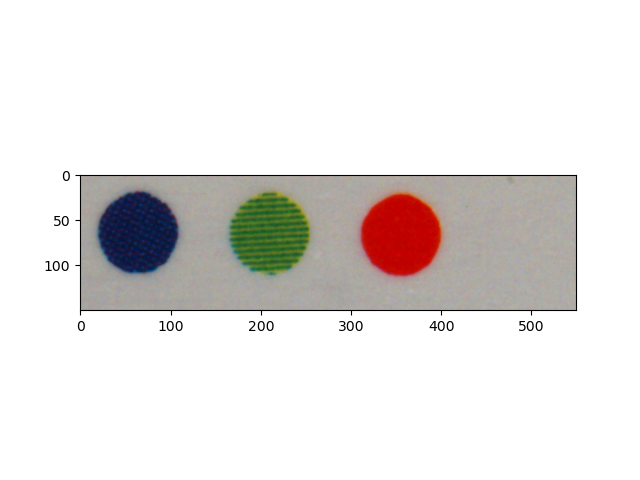

In [25]:
plt.figure()
plt.imshow(ref)
plt.show()

In [26]:
print(generate_global_ref(ref))

[[108.02540184 139.62382916 143.32174382  52.1631283   32.79271589
   30.06981008]
 [ 24.89660447  35.29412664  73.76888957  23.55514642  22.36314689
   19.02926291]
 [ 67.36350598 111.5510757   43.96621514  28.32863443  13.3620285
   14.88156076]
 [192.3029316   11.67163022   6.45059718   4.50712299  23.64525006
   20.46606037]
 [174.96851347 170.79942477 165.01983046   3.94975732   3.05061842
    4.89765683]]


/Users/matheusferreira/Desktop/AgroPad External Code/uIPL_2022_v2.py:579: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cont = np.array(find_contours(masked_img, .7, fully_connected='high'))
/Users/matheusferreira/Desktop/AgroPad External Code/uIPL_2022_v2.py:589: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ctr = np.array(ctr)
/Users/matheusferreira/Desktop/AgroPad External Code/uIPL_2022_v2.py:465: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  pixel = circle(positiony,positionx,r